In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_blobs

In [2]:
#generate dummy values
X, y = make_blobs(n_samples=1000, centers=2,n_features=2, random_state=78)


In [3]:
#create df with the dummy data
df = pd.DataFrame(X, columns=["Feature 1","Feature 2"])
df["Target"] = y


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

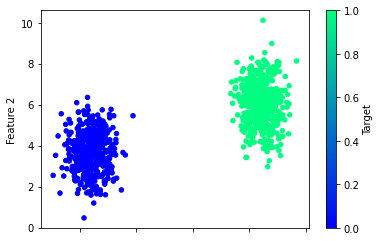

In [4]:
#plot the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2",c="Target",colormap="winter")

In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
#create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

#Fit the scaler
X_scaler.fit(X_train)

#Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
#create keras sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
#Add our first Dense Layer including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [9]:
#add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
#check the model structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Compile the sequential model and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [12]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 522us/step - loss: 0.4702 - accuracy: 0.9236
Epoch 2/100
24/24 [==============================] - 0s 565us/step - loss: 0.4422 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 652us/step - loss: 0.4344 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 609us/step - loss: 0.4324 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 608us/step - loss: 0.4223 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 652us/step - loss: 0.4043 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 652us/step - loss: 0.3938 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 652us/step - loss: 0.3619 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 696us/step - loss: 0.3656 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 696us/step - loss: 0.3646 - accura

24/24 [==============================] - 0s 652us/step - loss: 0.0969 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 652us/step - loss: 0.0873 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 652us/step - loss: 0.0928 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 696us/step - loss: 0.0842 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 696us/step - loss: 0.0873 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 609us/step - loss: 0.0887 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 696us/step - loss: 0.0842 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 696us/step - loss: 0.0861 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 609us/step - loss: 0.0809 - accuracy: 1.

<AxesSubplot:>

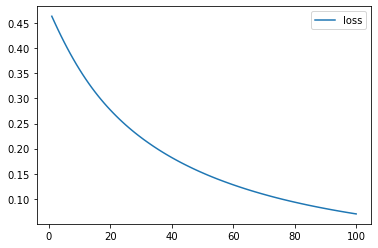

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

#plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

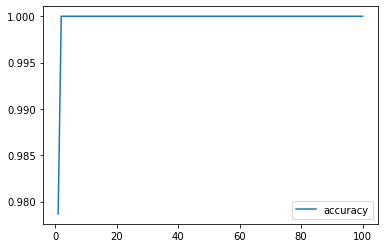

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
#Evaluate the model using test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0726 - accuracy: 1.0000
Loss:0.07262824475765228, Accuracy: 1.0


In [17]:
#predict the classification of a new set of blob data
new_X, new_y = make_blobs(n_samples=10,centers=2,n_features=2,random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])